(1001, 214)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB
None
        Unnamed: 0     IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count  1001.000000  1001.000000  1001.000000   1001.000000        1001.000000   
mean    500.000000   222.805156   589.110728     72.508823          10.831637   
std     289.108111   402.169734   642.867508    684.482739           3.307505   
min       0.000000     0.003517     0.700808      0.011489           2.321942   
25%     250.000000    12.515396    99.999036      1.433333           9.252350   
50%     500.000000    46.585183   411.039342      3.846154          12.179236   
75%     750.000000   224.975928   894.089176     16.566667          13.167843   
max    1000.000000  4128.529377  4538.976189  15620.600000          15.933463   

       MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex          qed  \
count   

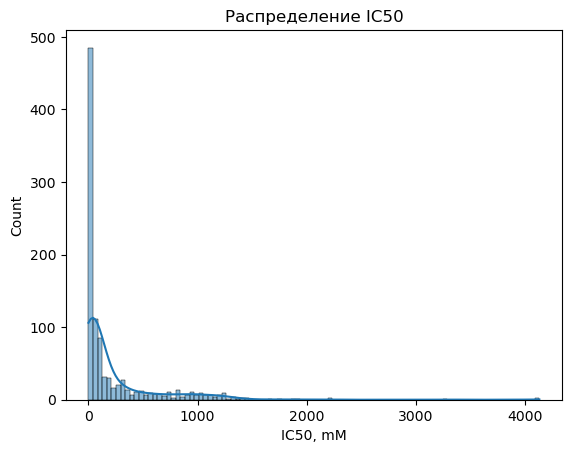

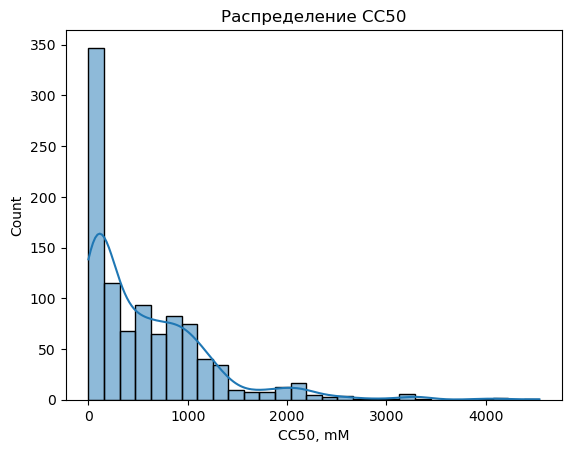

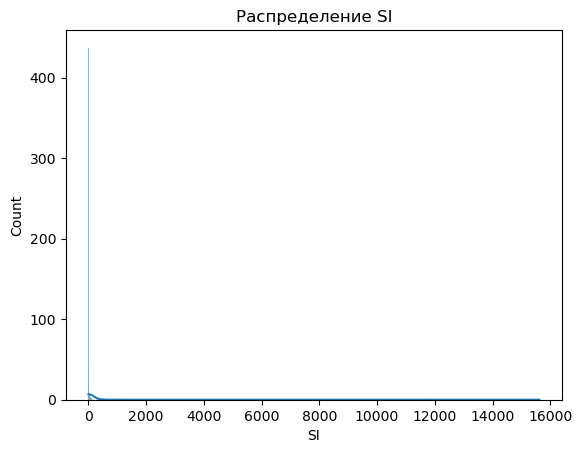

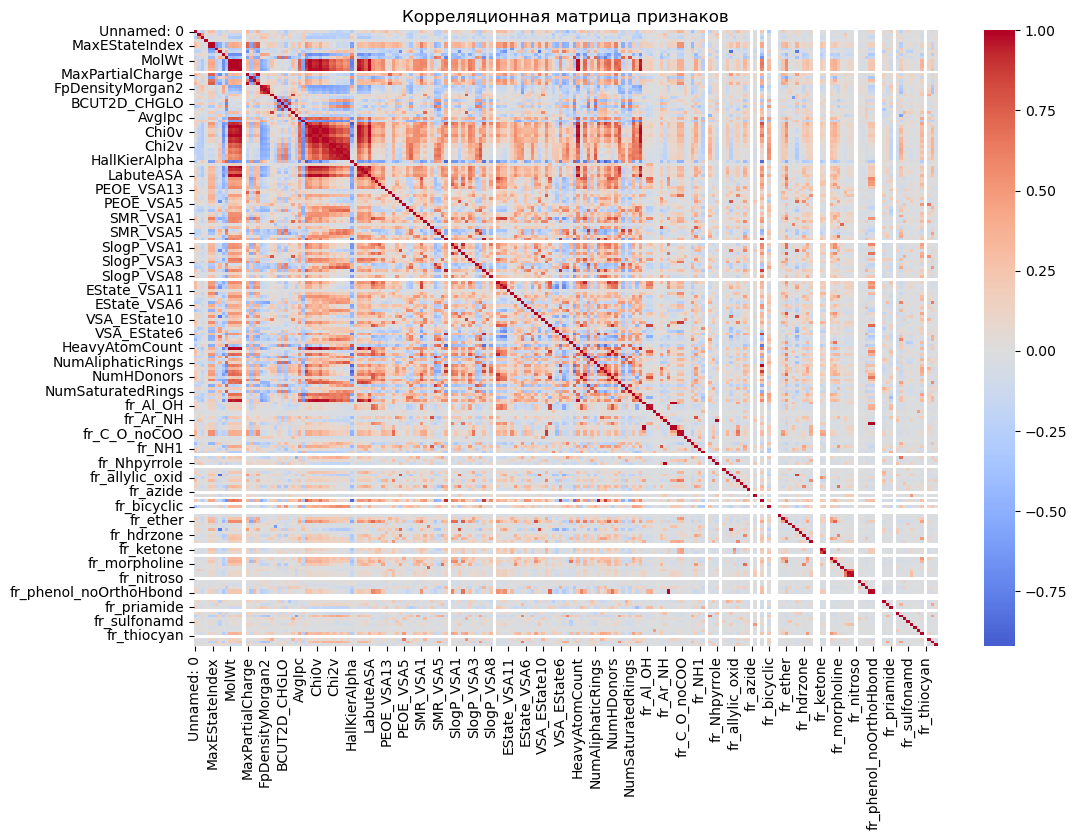

Форма данных: (1001, 214)

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB
None

Статистика по числовым признакам:
        Unnamed: 0     IC50, mM     CC50, mM            SI  MaxAbsEStateIndex  \
count  1001.000000  1001.000000  1001.000000   1001.000000        1001.000000   
mean    500.000000   222.805156   589.110728     72.508823          10.831637   
std     289.108111   402.169734   642.867508    684.482739           3.307505   
min       0.000000     0.003517     0.700808      0.011489           2.321942   
25%     250.000000    12.515396    99.999036      1.433333           9.252350   
50%     500.000000    46.585183   411.039342      3.846154          12.179236   
75%     750.000000   224.975928   894.089176     16.566667          13.167843   
max    1000.000000  4128.529377  4538.976189  15620.600000          15.933463   

       Max

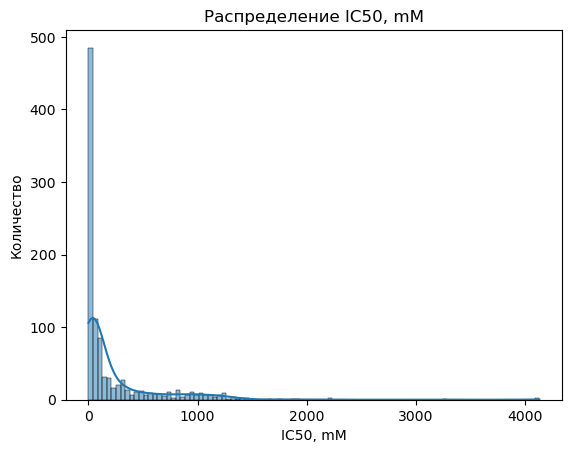

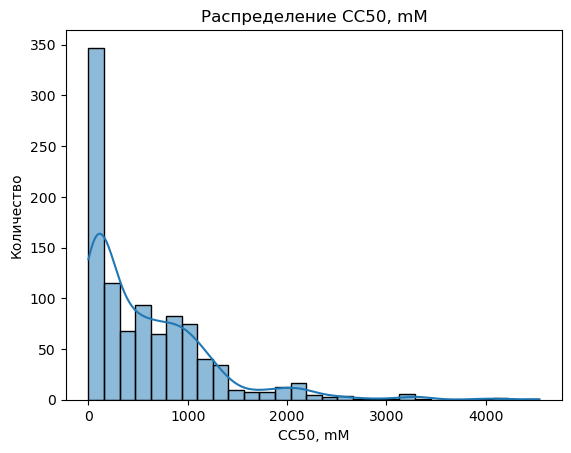

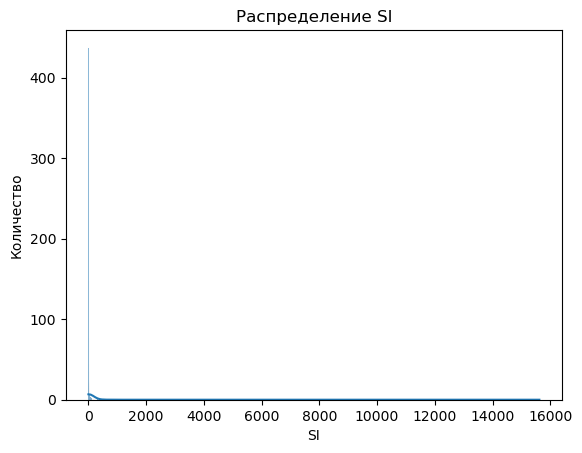

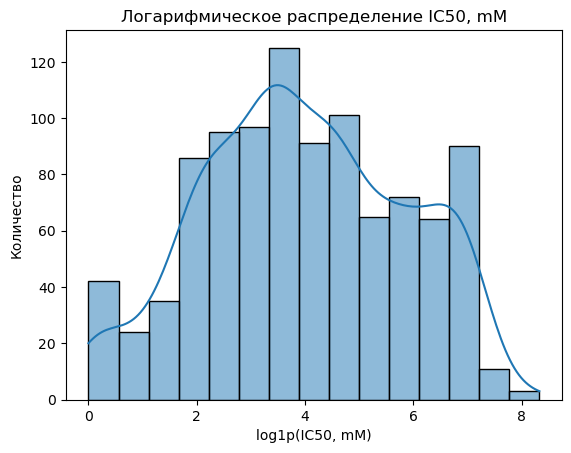

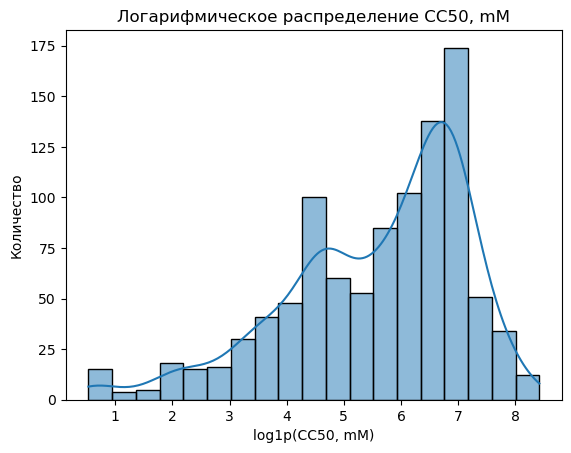

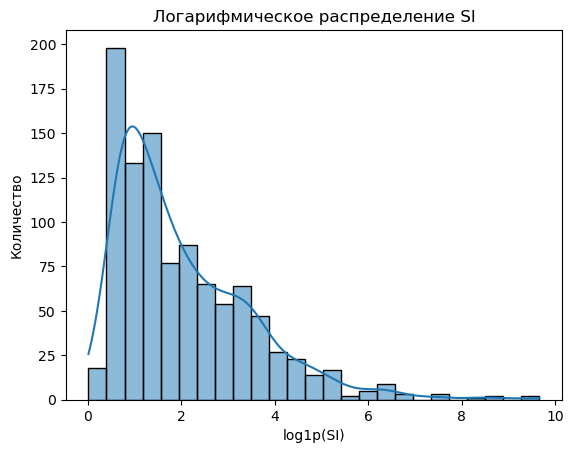

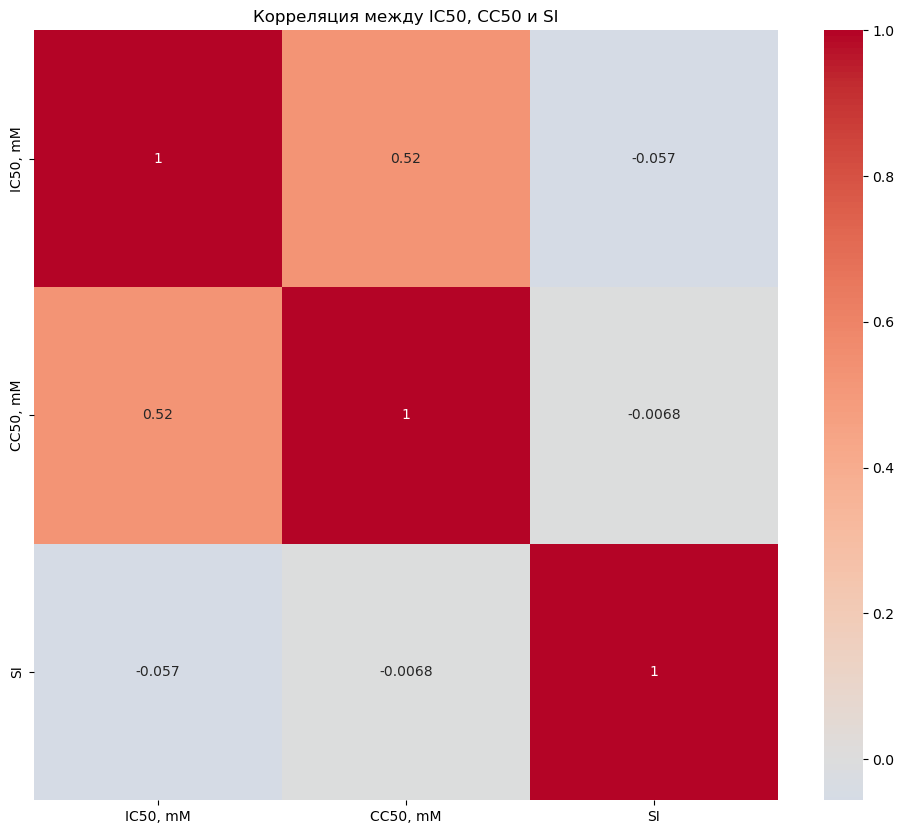

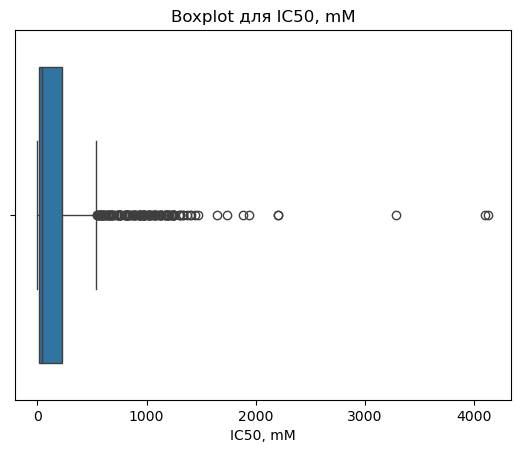

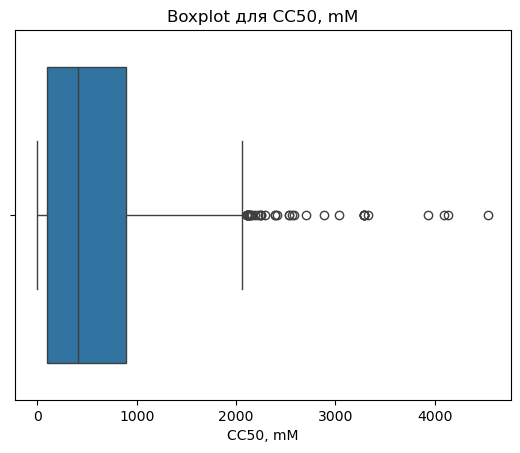

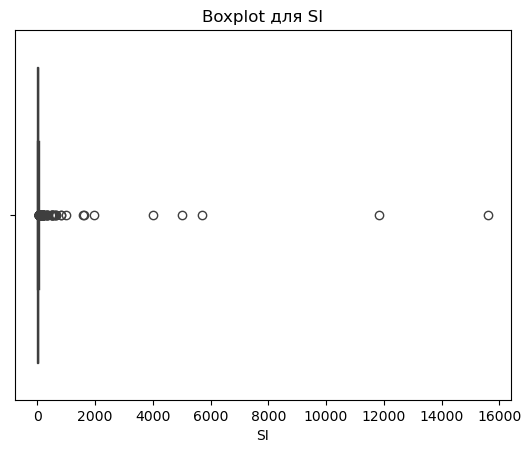

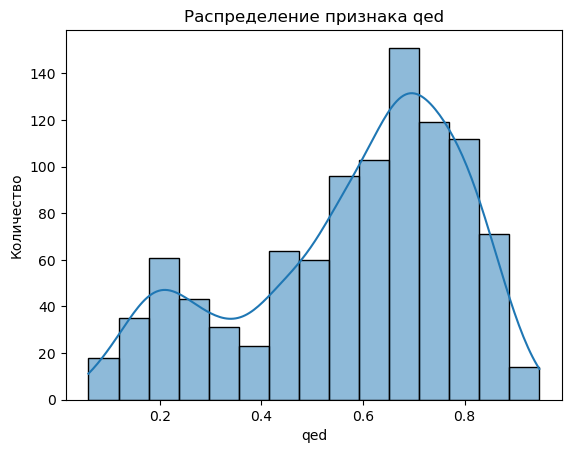

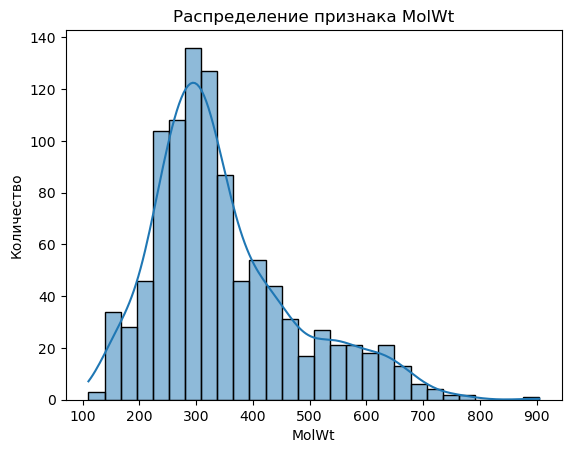

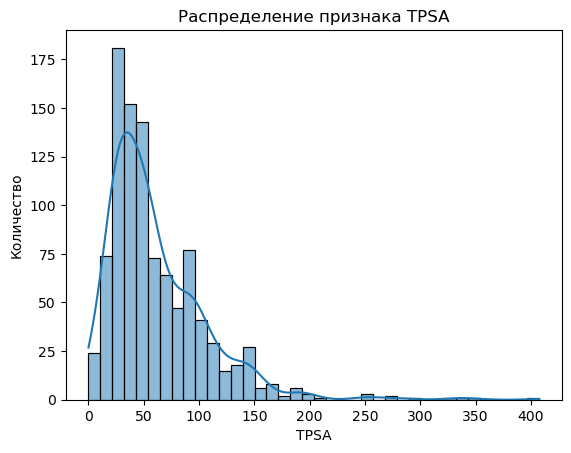


--- Выводы по данным ---
- Пропусков в основных признаках почти нет (или мало).
- Распределение IC50, CC50 и SI — сильно смещено вправо (нормализуется логарифмированием).
- Видны выбросы в IC50 и CC50 — рекомендуется логарифмировать перед обучением моделей.
- Значение SI варьируется очень сильно (0.01 до 15000).


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
df = pd.read_excel('kurs.xlsx')

# Просмотр данных
print(df.shape)
print(df.info())
print(df.describe())

# Пропуски
print(df.isnull().sum())

# Распределение целевых переменных
sns.histplot(df['IC50, mM'], kde=True)
plt.title('Распределение IC50')
plt.show()

sns.histplot(df['CC50, mM'], kde=True)
plt.title('Распределение CC50')
plt.show()

sns.histplot(df['SI'], kde=True)
plt.title('Распределение SI')
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков')
plt.show()

# Первичный просмотр
print("Форма данных:", df.shape)
print("\nИнформация о данных:")
print(df.info())
print("\nСтатистика по числовым признакам:")
print(df.describe())

# Проверка пропусков
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())

# Распределение целевых признаков
targets = ['IC50, mM', 'CC50, mM', 'SI']

for target in targets:
    plt.figure()
    sns.histplot(df[target], kde=True)
    plt.title(f'Распределение {target}')
    plt.xlabel(target)
    plt.ylabel('Количество')
    plt.show()

# Логарифмическое распределение целей
for target in targets:
    plt.figure()
    sns.histplot(np.log1p(df[target]), kde=True)
    plt.title(f'Логарифмическое распределение {target}')
    plt.xlabel(f'log1p({target})')
    plt.ylabel('Количество')
    plt.show()

# Корреляционная матрица по основным целям
plt.figure(figsize=(12,10))
corr = df[targets].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Корреляция между IC50, CC50 и SI')
plt.show()

# Обнаружение выбросов по целям (ящичные диаграммы)
for target in targets:
    plt.figure()
    sns.boxplot(x=df[target])
    plt.title(f'Boxplot для {target}')
    plt.show()

# Распределение важных признаков (например, qed, MolWt, TPSA)
important_features = ['qed', 'MolWt', 'TPSA']

for feature in important_features:
    if feature in df.columns:
        plt.figure()
        sns.histplot(df[feature], kde=True)
        plt.title(f'Распределение признака {feature}')
        plt.xlabel(feature)
        plt.ylabel('Количество')
        plt.show()

# Вывод общих выводов
print("\n--- Выводы по данным ---")
print("- Пропусков в основных признаках почти нет (или мало).")
print("- Распределение IC50, CC50 и SI — сильно смещено вправо (нормализуется логарифмированием).")
print("- Видны выбросы в IC50 и CC50 — рекомендуется логарифмировать перед обучением моделей.")
print("- Значение SI варьируется очень сильно (0.01 до 15000).")
